# Multiple Linear Regressio for Bike Sharing Demand Study

## Goal:

- `To create a Linear Model to forecast bike rental demand by combining historical usage patterns data`

## Step 1: Reading and Understanding the Data

In [1]:
# Importing essential libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data in a DataFrame

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking number of rows in dataset
bike.shape

(730, 16)

In [4]:
#Checking if there are any missing data/null records
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Numerical columns stats
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Manipulation & Visualisation

In [6]:
# We can drop 'instant' as its an index column, not really requried in our model building
bike.drop('instant', axis=1, inplace=True)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Before converting into Categorical , we need to change the datatypes of these columns
bike['season'] = bike['season'].astype(str)
bike['weathersit'] = bike['weathersit'].astype(str)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 85.7+ KB


In [8]:
# Let change 'season' into categorical variable
col = ['season']
bike[col] = bike[col].apply(lambda x: x.map({'1':'spring','2':'summer','3':'fall','4':'winter'}))

bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Let change 'weathersit' into categorical variable
col = ['weathersit']
bike[col] = bike[col].apply(lambda x: x.map({'1':'Clear','2':'Mist','3':'Light Rain','4':'Heavy Rain'}))

bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Let change 'mnth' into categorical variable
def mnth_conv(x):
    return x.map({
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    })

bike[['mnth']] = bike[['mnth']].apply(mnth_conv)

bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Let change 'weekday' into categorical variable
def weekday_conv(x):
    return x.map({
        0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri',
        6:'Sat'
    })

bike[['weekday']] = bike[['weekday']].apply(weekday_conv)

bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

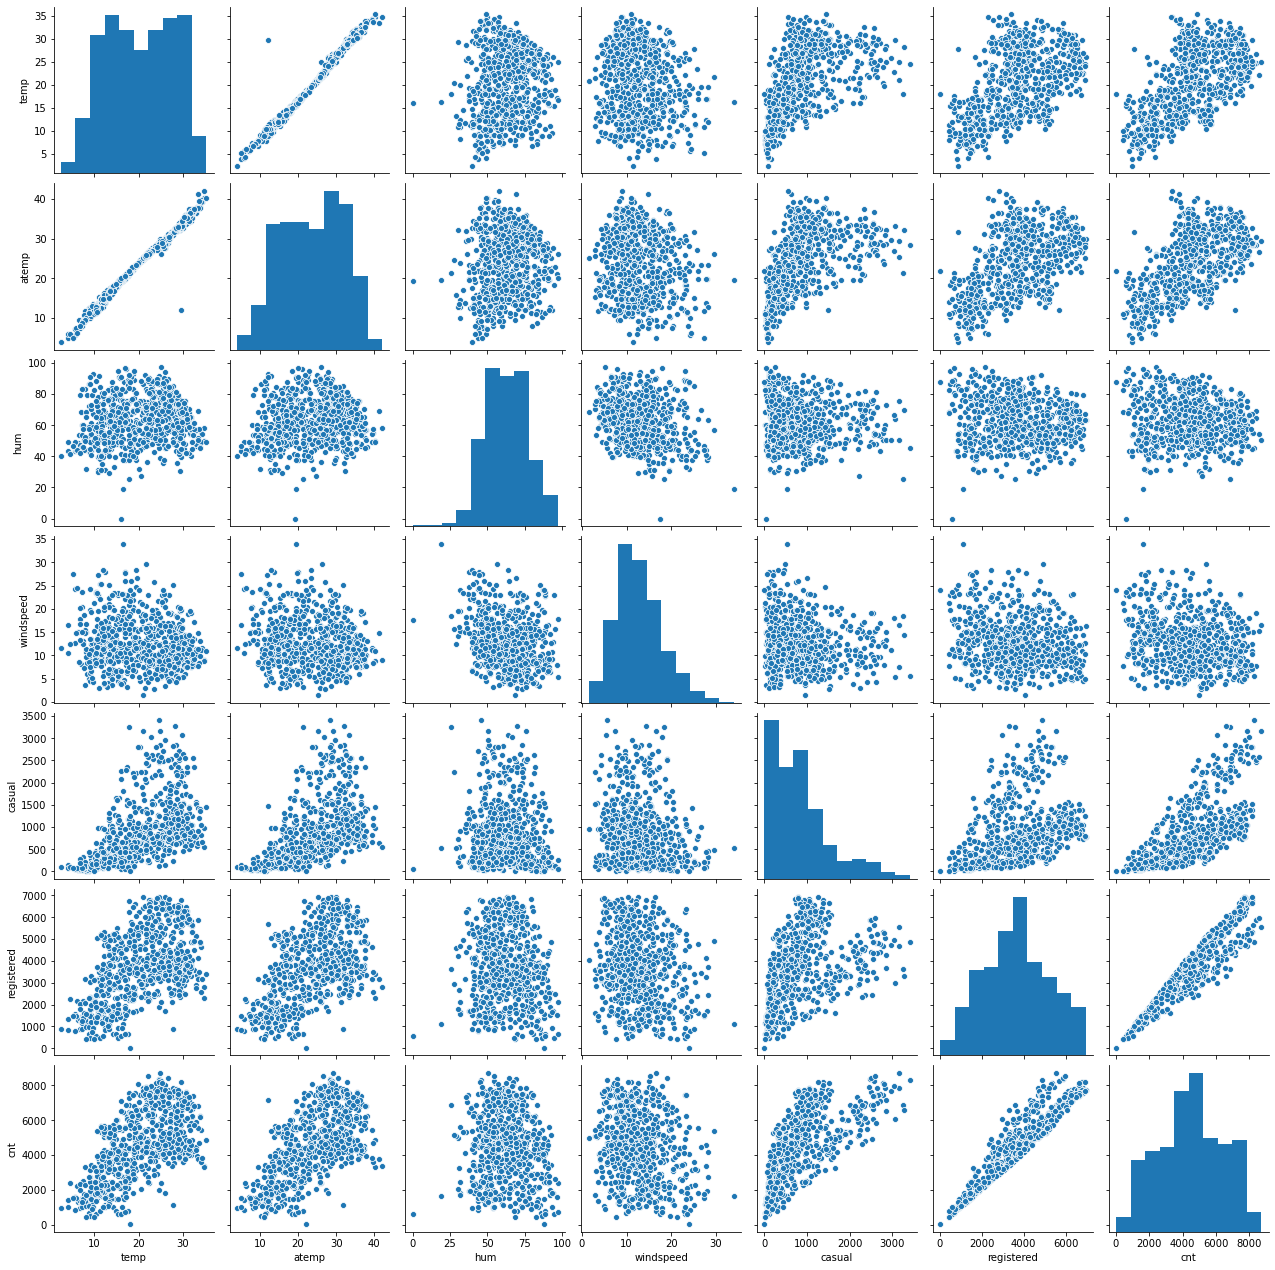

In [12]:
sns.pairplot(bike[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

- Among Numerical variables `temp` and `atemp` shows some Linear relation with `cnt` and among themselves as well

### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

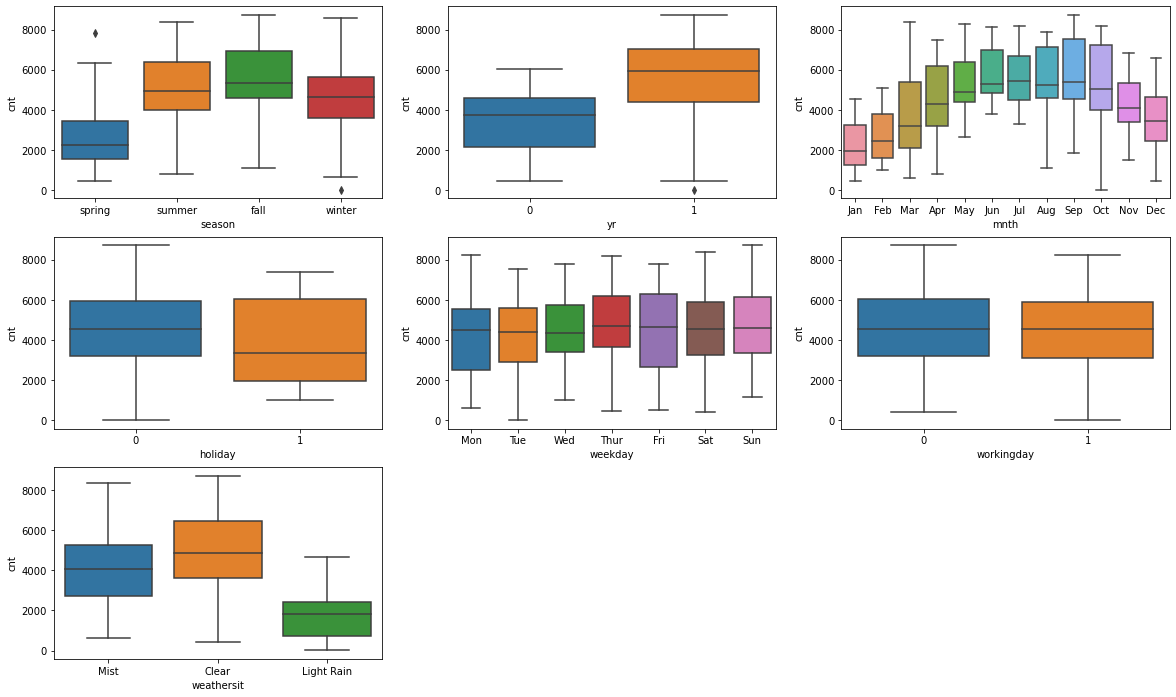

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

- We can obeserve below from above graphs
    - Season: During Spring the demand of shared bikes has gone down drastically. And during Fall, the demand is highest.
    - Month: Month variable also shows that the demand of shared bikes has gone UP during Summer and Fall.
    - Holiday: During Non-Holidays , the demand is higher when compare of Holidays.

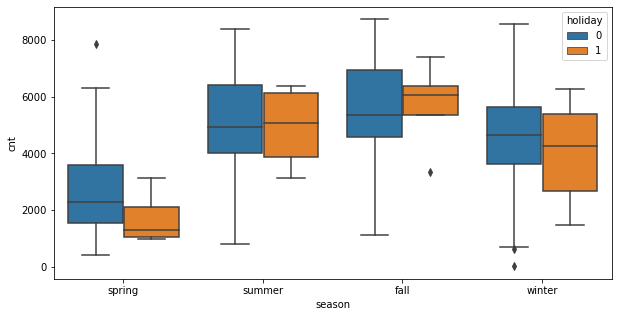

In [14]:
# PLotting Season with Holiday to see if Holidays depends on seasons
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bike)
plt.show()

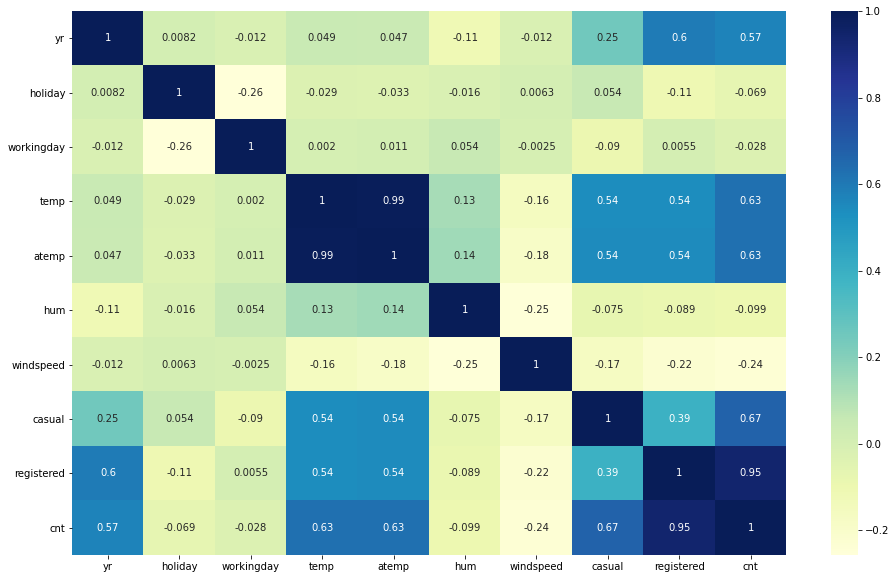

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

- We can obeserve below from above graphs

    - With Target variable `cnt`
        - `temp`,`yr`,`atemp` has high correlation 
        - `casual` and `registered` has high correlation, understandable as both combined together forms `cnt`. So we can right away say that these 2 are redudant variables
        - `windspeed` also has a decent value of correlation.
    
    - `holiday` and `workingday` has decent value of correlation among themselves, so intial guess - only one of these will remain in final model variable list.
    - Similarly, `windspeed` and `hum` has decent value of correlation among themselves, so intial guess - only one of these will remain in final model variable list.

## Step 3: Data Preparation

### Dummy Variables

In [16]:
# Get the dummy variables for the feature 'season', 'weathersit', 'mnth' and 'weekday' 

d1 = pd.get_dummies(bike['season'], drop_first=True) ## for season feature
bike = pd.concat([bike, d1], axis = 1)  # Add the results to the original bike dataframe

d2 = pd.get_dummies(bike['weathersit'],drop_first=True) ## for weathersit feature
bike = pd.concat([bike, d2], axis = 1)  # Add the results to the original bike dataframe

d3 = pd.get_dummies(bike['mnth'], drop_first=True) ## for season feature
bike = pd.concat([bike, d3], axis = 1)  # Add the results to the original bike dataframe

d4 = pd.get_dummies(bike['weekday'],drop_first=True) ## for weathersit feature
bike = pd.concat([bike, d4], axis = 1)  # Add the results to the original bike dataframe

In [17]:
d2.head()

,Light Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


- The data set has only 3 values for `weathersit` variable, so creating dummies has only created 2 sets of columns.

In [18]:
# Now let's see the head of our dataframe.

bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,01-01-2018,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,...,0,0,0,0,1,0,0,0,0,0
1,02-01-2018,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,...,0,0,0,0,0,0,0,0,1,0
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,...,0,0,0,0,0,0,0,0,0,1
3,04-01-2018,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,...,0,0,0,0,0,0,0,1,0,0
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Drop the columns for which we have created the dummies for and 'dteday' column as we already have already have data in month, year columns.
#'season', 'dteday','mnth', 'weekday', 'weathersit'

bike.drop(['season','dteday','weathersit','mnth','weekday'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# We can drop 'registered' and 'casual' variables as well as their sum is present in our target 'cnt' variable,
# Also 'atemp' has High correlation with 'temp' as shown in pairplot above so this can also be dropped.

bike.drop(['casual','registered','atemp'], axis = 1, inplace = True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Train_Test Sets and Scaling

### Splitting Data into train_test

In [21]:
# Importing the train_test library
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the variables

- We will use MinMax Scaler here

In [22]:
# Importing the Library
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler() # Instantiating the object

In [26]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])    #Using fit_transform on Training set

In [27]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,-2.687393e-16,-3.459107e-16,-2.351061e-16,-5.398732e-17,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# Validating the MIN and MAX after Scaling
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,-2.687393e-16,-3.459107e-16,-2.351061e-16,-5.398732e-17,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,-2.381246e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [29]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [30]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Rain,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
653,1,0,1,-0.121335,-0.514725,-0.117752,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,1.231731,0.516433,-0.330615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,-0.420478,-0.069854,-0.385694,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,-1.294913,-1.045032,2.018143,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.627580,-1.000840,-0.779889,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 5: Building linear models

- We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### `RFE` - Feature selection 

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
# Validating the ranking of variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', False, 11),
 ('windspeed', False, 6),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 14),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 18),
 ('Mar', False, 19),
 ('May', False, 10),
 ('Nov', True, 1),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Mon', False, 13),
 ('Sat', False, 8),
 ('Sun', False, 9),
 ('Thur', False, 17),
 ('Tue', False, 12),
 ('Wed', False, 15)]

In [34]:
# List of selected features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'spring', 'winter', 'Light Rain', 'Mist',
       'Jul', 'Nov', 'Sep'],
      dtype='object')

In [35]:
# Dropping the variables where we have received False values
X_train.columns[~rfe.support_]

Index(['workingday', 'hum', 'windspeed', 'summer', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel and VIF checking

#### Linear model 1

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [37]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
X_train_rfe.head()

,const,yr,holiday,temp,spring,winter,Light Rain,Mist,Jul,Nov,Sep
653,1.0,1,0,-0.121335,0,1,0,0,0,0,0
576,1.0,1,0,1.231731,0,0,0,0,1,0,0
426,1.0,1,0,-0.420478,1,0,0,1,0,0,0
728,1.0,1,0,-1.294913,1,0,0,0,0,0,0
482,1.0,1,0,-0.627580,0,0,0,1,0,0,0


In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          7.68e-181
Time:                        19:05:24   Log-Likelihood:                -281.22
No. Observations:                 510   AIC:                             584.4
Df Residuals:                     499   BIC:                             631.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2908      0.043     -6.829      0.000      -0.374      -0.207
yr             1.0389      0.038     27.364      0.000       0.964       1.113
holiday       -0.4245      0.121     -3.503      0.001      -0.663      -0.186
temp           0.4668      0.032     14.755      0.000       0.405       0.529
spring        -0.5071      0.070     -7.218      0.000      -0.645      -0.369
winter         0.2899      0.061      4.740      0.000       0.170       0.410
Light Rain    -1.3461      0.114    -11.853      0.000      -1.569      -1.123
Mist          -0.3575      0.040     -8.834      0.000      -0.437      -0.278
Jul           -0.3022      0.080     -3.777      0.000      -0.459      -0.145
Nov           -0.1422      0.081     -1.758      0.079      -0.301       0.017
Sep            0.2830      0.073      3.897      0.000       0.140       0.426
==============================================================================
Omnibus:                       70.276   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.677
Skew:                          -0.682   Prob(JB):                     1.07e-41
Kurtosis:                       5.649   Cond. No.                         8.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analysis LM1
 - R-squared and Adjusted R-square values are ~82% which is very good.
 - We can also see that `Nov` column has high p-value (0.07) so we can drop this column and rebuild the model

In [40]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'spring', 'winter', 'Light Rain',
       'Mist', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [41]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

#### VIF check

In [42]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.44
3,spring,2.22
4,winter,2.03
0,yr,1.67
8,Nov,1.59
6,Mist,1.36
7,Jul,1.34
9,Sep,1.17
1,holiday,1.06
5,Light Rain,1.05


- Here we can see that VIF for `hum` and `temp` are very high, if we set our limit as `5`. Lets drop `hum` first and rebuild the model

In [44]:
# Dropping 'hum'
X_train_new = X_train_rfe.drop(['Nov'], axis=1)
X_train_new.head()

,const,yr,holiday,temp,spring,winter,Light Rain,Mist,Jul,Sep
653,1.0,1,0,-0.121335,0,1,0,0,0,0
576,1.0,1,0,1.231731,0,0,0,0,1,0
426,1.0,1,0,-0.420478,1,0,0,1,0,0
728,1.0,1,0,-1.294913,1,0,0,0,0,0
482,1.0,1,0,-0.627580,0,0,0,1,0,0


#### Linear model 2

In [45]:
lm2 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#summary of our linear model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          2.16e-181
Time:                        19:10:27   Log-Likelihood:                -282.79
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     500   BIC:                             627.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2970      0.043     -6.985      0.000      -0.381      -0.213
yr             1.0386      0.038     27.300      0.000       0.964       1.113
holiday       -0.4506      0.120     -3.740      0.000      -0.687      -0.214
temp           0.4738      0.031     15.063      0.000       0.412       0.536
spring        -0.4934      0.070     -7.051      0.000      -0.631      -0.356
winter         0.2486      0.057      4.393      0.000       0.137       0.360
Light Rain    -1.3382      0.114    -11.768      0.000      -1.562      -1.115
Mist          -0.3546      0.041     -8.752      0.000      -0.434      -0.275
Jul           -0.3065      0.080     -3.824      0.000      -0.464      -0.149
Sep            0.2932      0.073      4.042      0.000       0.151       0.436
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.340
Skew:                          -0.661   Prob(JB):                     2.29e-38
Kurtosis:                       5.532   Cond. No.                         8.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analysis LIM2
- R-squared and Adjusted R-square values are still ~82% which is not a significant descrease from 83% , after dropping `Nov`. Also, the p-value of all remaining variables are now ~0. 

#### VIF check again

In [46]:
# Dropping 'const' column to calculate VIF again
X_train_new = X_train_new.drop(['const'], axis=1)

# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.41
3,spring,2.21
0,yr,1.67
4,winter,1.55
6,Mist,1.36
7,Jul,1.34
8,Sep,1.16
5,Light Rain,1.05
1,holiday,1.04


 - Now we can see that - VIF is less than 5 for all variables

## Step 6:  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [47]:
X_train_new = sm.add_constant(X_train_new)

y_train_cnt = lm2.predict(X_train_new)

Text(0.5, 0, 'Errors')

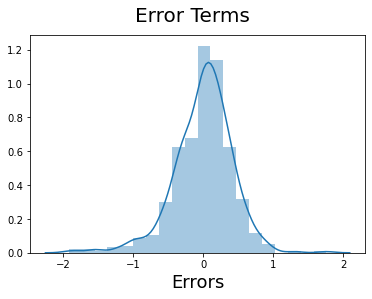

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

- We can see that Error Terms follows a `Normal Distribution` pattern with Mean centred to ZERO.

In [49]:
X_train_new = X_train_new.drop(['const'], axis=1)
X_train_new.head()

,yr,holiday,temp,spring,winter,Light Rain,Mist,Jul,Sep
653,1,0,-0.121335,0,1,0,0,0,0
576,1,0,1.231731,0,0,0,0,1,0
426,1,0,-0.420478,1,0,0,1,0,0
728,1,0,-1.294913,1,0,0,0,0,0
482,1,0,-0.627580,0,0,0,1,0,0


## Step 7: Making Predictions on Test set

### Applying the scaling on the test sets

In [50]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])  ## using TRANSFORM only on Test set

In [51]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.096083,-0.081388,-0.043731,0.031073,0.255708,0.264840,0.232877,...,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251
std,0.500722,0.188034,0.481313,1.035793,1.022197,0.942916,0.973536,0.437258,0.442259,0.423633,...,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974
min,0.000000,0.000000,0.000000,-2.174744,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.809372,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.094973,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.983209,0.641963,0.485055,0.709202,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.981904,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- After applying TRANSFORM on Test data, we can see that for `windspeed` variable, we have got `negative value` as minimum. 

### Dividing into X_test and y_test

In [52]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [53]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

### Making Predictions on Test set

In [54]:
# Making predictions
y_pred = lm2.predict(X_test_new)

## Step 8: Model Evaluation

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8092200832884747

#### Analysis
- R-squared value of Test set is ~79%, which is close to what we had for Training data. So our model has worked well on Test data set as well.

Text(0, 0.5, 'y_pred')

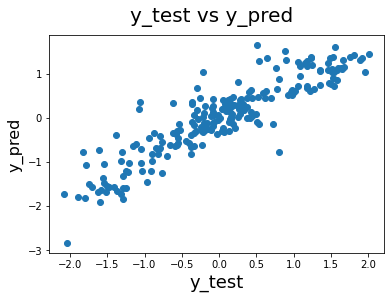

In [56]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

## Conclusion:
- We can see 1 Negative prediction here which can be due to Scaling of the Test variables based in `scaler` object of Training data set. We have made similar obsevation after applying scaling on test set , `windspeed` minimum value was negative.
- It is possible to cap the value of 'y_pred' to not show any negative values but we are not doing that here.
- The point here is - Even though we have got a Negative value, but the Relation shown between actual and predicted values here is Linear.